In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib   #burada işlemlerin hızlı gerçekleşmesi adına tensorflow-gpu yüklemesi yapılıyor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 578.1 MB 8.1 kB/s 
     |████████████████████████████████| 578.1 MB 7.1 kB/s 
     |████████████████████████████████| 511.8 MB 28 kB/s 


In [ ]:
!pip list  #burada yüklü paketlerin isimlerini ve versiyonlarını yazdırıp istenilen yüklemelerin gerçekleşip gerçekleşmediğine bakıyoruz.

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh                         2.3.3
branca

In [ ]:
import tensorflow as tf
import os     #Burada programlama sırasında kullanılacak tensorflow ve os modülllerini import ediyoruz

In [ ]:
os.path.join('photo')
from google.colab import drive
drive.mount("/content/gdrive")      #Burada colab ile programlama sırasında kullanılcak verisetinin bulunduğu drive hesabının bağlantısını gerçekleştiriyoruz.

Mounted at /content/gdrive


In [ ]:

%cd /content/gdrive/My Drive/photos   #Burada photos klasörüne erişim sağlıyoruz.

/content/gdrive/My Drive/photos


In [ ]:
import numpy as np
from matplotlib import pyplot as plt # Burada programlama sırasında kullanılacak numpy ve matplotlib modüllerinin import işlemini yapıyoruz.

In [ ]:
from tensorflow.keras.preprocessing import image #Burada tensorflow içinde bulunan image'i import ediyoruz

In [ ]:
file = '/content/gdrive/My Drive/photos//photo/hata/hh1 (10).jpg'
img = image.load_img(file, target_size =(224,244)) # Yukarıda import edilen image ile üst satırda adresi verilen resmi yüklüyoruz.

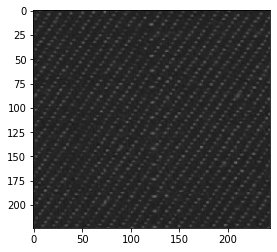

In [ ]:
plt.imshow(img) #img ögesini matplotlib ile çıktıda gösteriyoruz.

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/gdrive/My Drive/photos/photo') #Kullanılacak verisetinin bulunduğu dosyaya erişerek içerik hakkında bilgi alıyoruz.

Found 2100 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()  # Burada verisetinin ögeleri numpy ögesine dönüştürülüyor.
batch = data_iterator.next() #Burada sürekli olarak bir sonraki elemana geçiş yapmak için next fonksiyonu kullanılıyor.
batch[0].shape #ögenin boyut bilgisini öğrenmek için kullanılıyor.

(32, 256, 256, 3)

In [ ]:
batch[1] #Burada 0 ve 1'lerden oluşan array yazdırılıyor.

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

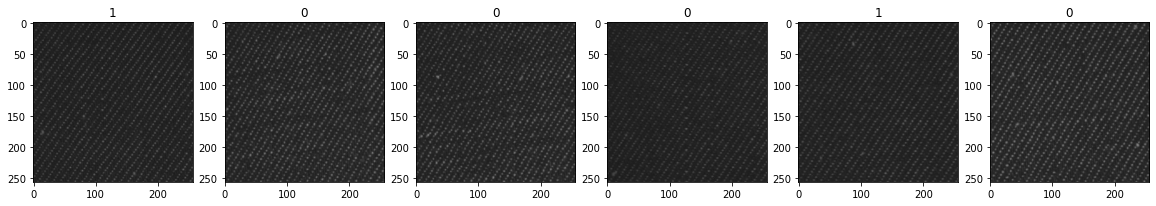

In [ ]:
fig,ax = plt.subplots(ncols=6,figsize=(20,20)) #Bu kısımda örnek olarak 6 resim matplotlib ile çıktıda gösteriliyor. (0 başlıklı olanlar hatalı, 1 başlıklı olanlar sağlam)
for idx,img in enumerate(batch[0][:6]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y:(x/255,y))   #Burada veriler kullanıma daha uygun olacak şekilde yeniden boyutlandırılıyor.
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [ ]:
batch[0].max() #Burada kontrol amaçlı yeni boyutlandırmada bulunan en yüksek değer yazdırılıyor.

0.8633502

In [ ]:
train_size = int(len(data)* .70) + 1  #Burada veriler train,test ve validation olarak 3 gruba ayrıldığında sahip olacakları büyüklükler belirleniyor.
test_size = int(len(data)*0.1)
val_size = int(len(data)*0.2)

train_size + test_size + val_size

66

In [ ]:
train = data.take(train_size) #Burada gruplara yukarıdan belirlenmiş boyutlarına uygun olacak şekilde veriler dağıtılıyor.
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential  #Burada tensorflow içinde bulunan ve model oluşturmada kullanılacak classlar import ediliyor.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential() #Sequential class'ından bir model nesnesi türetiliyor.

In [ ]:
model.add(Conv2D(16, (3,3),1,activation="relu", input_shape=(256,256,3))) #giriş katmanı
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),1,activation="relu")) # gizli katmanlar
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten()) #matrislerden vektörlere dönüştürme işlemi için flatten katmanı

model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid")) #çıkış katmanı

#Not: Burada katmanların sahip oldukları filters değerleri başarı durumuna göre denemelerle belirlenmiştir.
#Not: Aktivasyon fonksiyonu olarak yaygın kullanımı ve başarısı nedeniyle relu seçilmiştir.
#Not: Çıktıda 0 ve 1 aralığında bir sonuç alabilmek için sigmoid fonksiyonu kullanılmıştır.

In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy']) #modelin derlenmesi için compile fonksiyonu kullanılır. Optimizer olarak Adam tercih edildi.

In [ ]:
model.summary() #Oluşturulan model hakkında bilgiler burada çıktıya yazdırılıyor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [ ]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train,epochs=10,validation_data=val,callbacks=[tensorboard_callback]) #Burada modelin eğitimi gerçekleştiriliyor.

Epoch 1/10
47/47 [==============================] - 331s 7s/step - loss: 0.6482 - accuracy: 0.6549 - val_loss: 0.5581 - val_accuracy: 0.6178
Epoch 2/10
47/47 [==============================] - 10s 199ms/step - loss: 0.5124 - accuracy: 0.6995 - val_loss: 0.4779 - val_accuracy: 0.6466
Epoch 3/10
47/47 [==============================] - 10s 201ms/step - loss: 0.3776 - accuracy: 0.8324 - val_loss: 0.2191 - val_accuracy: 0.9375
Epoch 4/10
47/47 [==============================] - 10s 200ms/step - loss: 0.1878 - accuracy: 0.9295 - val_loss: 0.1845 - val_accuracy: 0.9351
Epoch 5/10
47/47 [==============================] - 9s 184ms/step - loss: 0.1174 - accuracy: 0.9561 - val_loss: 0.1662 - val_accuracy: 0.9471
Epoch 6/10
47/47 [==============================] - 9s 183ms/step - loss: 0.0720 - accuracy: 0.9761 - val_loss: 0.1483 - val_accuracy: 0.9615
Epoch 7/10
47/47 [==============================] - 9s 182ms/step - loss: 0.0338 - accuracy: 0.9907 - val_loss: 0.1904 - val_accuracy: 0.9519
Epoc

In [ ]:
import cv2 #Opencv import ediliyor

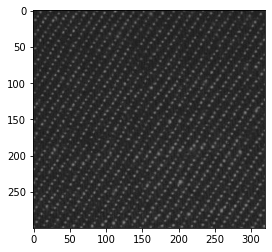

In [ ]:
img1 = cv2.imread('/content/gdrive/My Drive/photos//photo/hata/hh2 (22).jpg') #Burada verisetinden örnek bir veri kullanılıyor
plt.imshow(img1)
plt.show()

In [ ]:
resize = tf.image.resize(img1,(256,256)) #yukarıdaki resim yeniden boyutlandırılıp uygun bir hale getiriliyor.
resize.shape

TensorShape([256, 256, 3])

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0)) #Burada yukarıdaki resim hakkında bir tahmin sonucu dönüyor.
print("%.17f" %yhat)

1/1 [==============================] - 0s 18ms/step
0.00000000125560129


In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
res = []
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = new_model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)
  res.append(tf.math.confusion_matrix(y.round(),yhat))

In [ ]:
print(pre.result().numpy())
print(sum(res))

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join("models","imgclass.h5"))